###Nombre: Andy Fabricio Abad Freire

####Importaciones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

####Carga del csv

In [2]:
df = pd.read_csv('df_anscombe.csv')
df.head()

,x,y,group
0,10.0,8.04,1
1,8.0,6.95,1
2,13.0,7.58,1
3,9.0,8.81,1
4,11.0,8.33,1


####Descripcion de los valores del dataset

In [3]:
df.groupby('group').describe()

x                                               y            \
      count mean       std  min  25%  50%   75%   max count      mean   
group                                                                   
1      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
2      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
3      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
4      11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                 
            std   min    25%   50%   75%    max  
group                                            
1      2.031568  4.26  6.315  7.58  8.57  10.84  
2      2.031657  3.10  6.695  8.14  8.95   9.26  
3      2.030424  5.39  6.250  7.11  7.98  12.74  
4      2.030579  5.25  6.170  7.04  8.19  12.50

####Grafico de la figuras

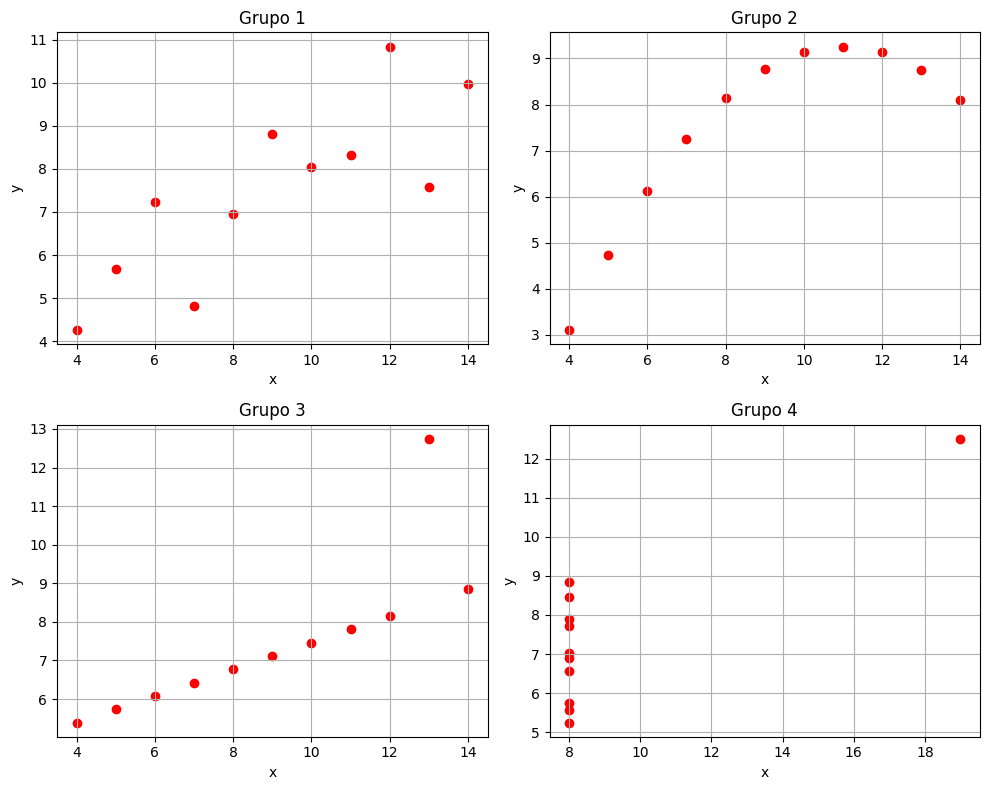

In [7]:
# Crear figura y ejes
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 4 subplots (2x2)
axs = axs.flatten()  # Para iterar fácilmente

# Gráficos por grupo
for i, group in enumerate(df['group'].unique()):
    subset = df[df['group'] == group]
    axs[i].scatter(subset['x'], subset['y'], color='red')
    axs[i].set_title(f'Grupo {group}')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

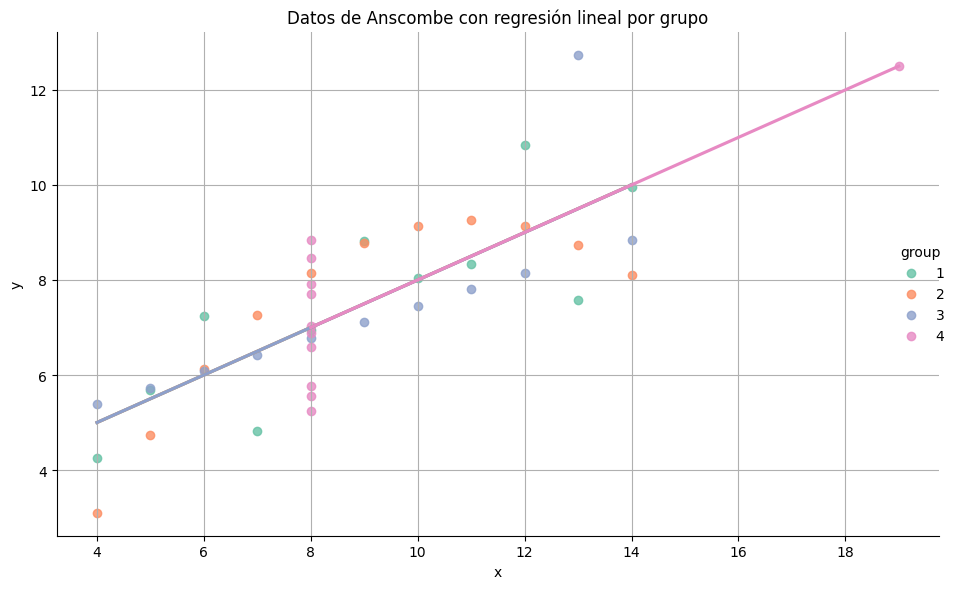

In [8]:
# Sacar la regresion lineal en una sola grafica de todas los grupos
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Usar seaborn para trazar los puntos y la regresión
sns.lmplot(
    data=df,
    x='x',
    y='y',
    hue='group',
    markers=['o', 'o', 'o', 'o'],
    height=6,
    aspect=1.5,
    ci=None,
    palette='Set2'
)

plt.title('Datos de Anscombe con regresión lineal por grupo')
plt.grid(True)
plt.tight_layout()
plt.show()

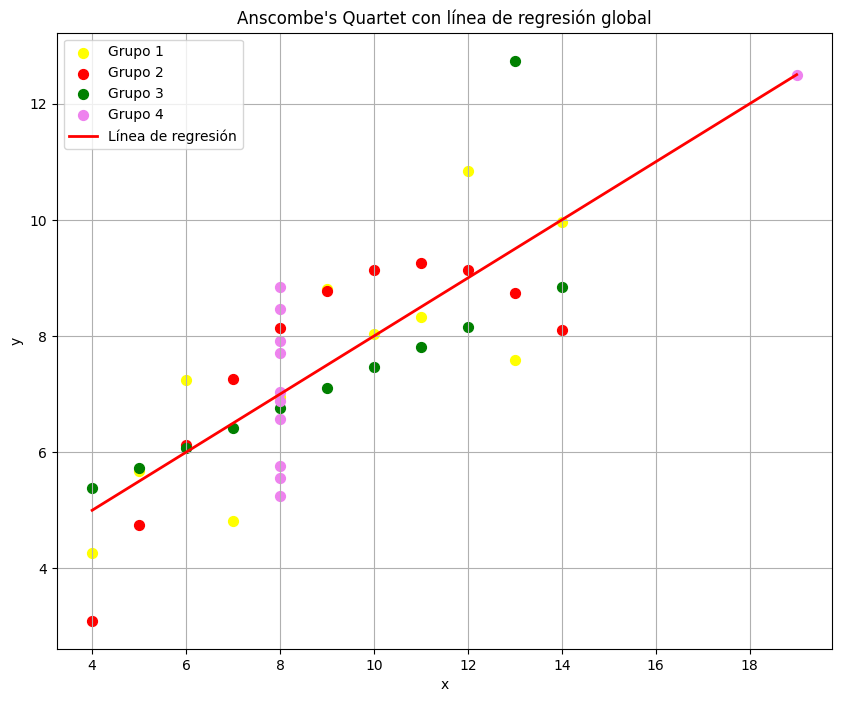

In [9]:
# Definir colores para cada grupo
colores = {1: 'yellow', 2: 'red', 3: 'green', 4: 'violet'}

plt.figure(figsize=(10, 8))

# Graficar los puntos de cada grupo con un color distinto
for grupo, color in colores.items():
    data = df[df['group'] == grupo]
    plt.scatter(data['x'], data['y'], color=color, label=f'Grupo {grupo}', s=50)

# Calcular la línea de regresión global (para todos los datos)
slope, intercept = np.polyfit(df['x'], df['y'], 1)
x_vals = np.array([df['x'].min(), df['x'].max()])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', lw=2, label='Línea de regresión')

# Personalización del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title("Anscombe's Quartet con línea de regresión global")
plt.grid(True)
plt.legend()
plt.show()

####Margen de error

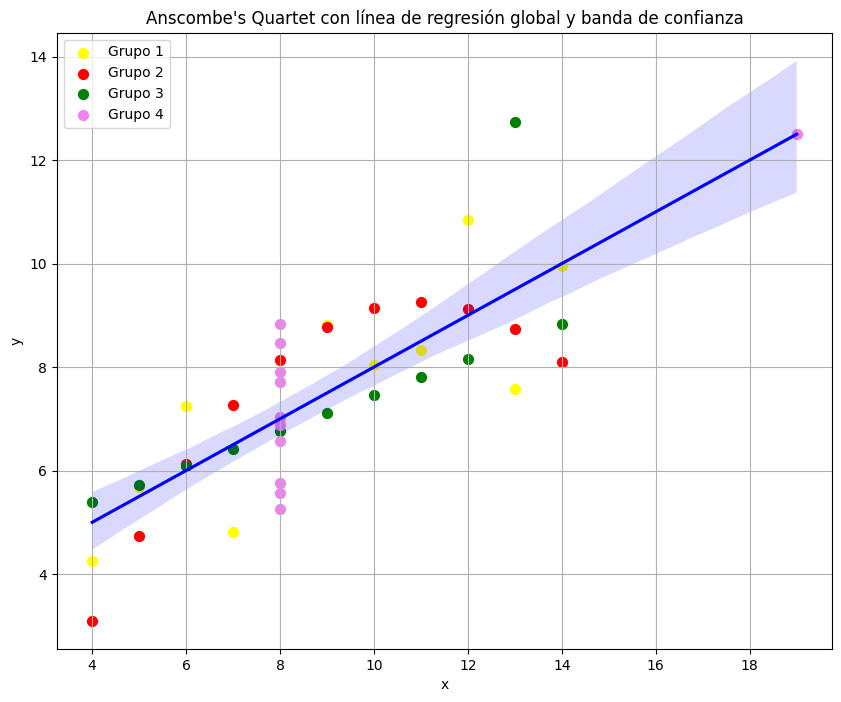

In [11]:
# Colores por grupo
colores = {1: 'yellow', 2: 'red', 3: 'green', 4: 'violet'}

plt.figure(figsize=(10, 8))

# Graficar los puntos por grupo
for grupo, color in colores.items():
    data = df[df['group'] == grupo]
    plt.scatter(data['x'], data['y'], color=color, label=f'Grupo {grupo}', s=50)

# Usar seaborn para trazar línea de regresión con banda de confianza del 95%
sns.regplot(x='x', y='y', data=df, scatter=False, ci=95, color='blue', line_kws={'label':'Línea de regresión'})

# Personalización del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title("Anscombe's Quartet con línea de regresión global y banda de confianza")
plt.grid(True)
plt.legend()
plt.show()